# Visualizing data

## import requirements and define constants value

In [3]:
import os

from preprocessing import get_processed_data
from constants import data_file_path, document_file_path
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import itertools
import matplotlib.colors as mcolors



# path to train and test csv files
train_csv_path = os.path.join(data_file_path, 'drugsComTrain_raw.csv')
test_csv_path = os.path.join(data_file_path, 'drugsComTest_raw.csv')

# change this number to change number of selected conditions to be consider more precisely 
# it has to be less than 51 in orther to get more readable result, as only 50 differenct color has been considered
conditions_selection_num = 30
# an int less than condtions_selection_num that represent which top condtions has been selected for classification task
selected_top = 10

## process raw csv data and save them for furthure usage

In [61]:
def save_processed_data(train_data_path, test_data_path):
    
    # call get_preprocessed_data on training data
    train = get_processed_data(train_data_path)
    # call get_preprocessed_data on test data
    test = get_processed_data(test_data_path)
    
    # save processed data to use it durthure
    with open(document_file_path + 'processed_data.pickle', 'wb') as processed_data_file:
        pickle.dump({'train': train, 'test': test}, processed_data_file, protocol=pickle.HIGHEST_PROTOCOL)
        
# an example of calling save_processed_data 
save_processed_data(train_csv_path, test_csv_path)

## draw conditins data pie plot

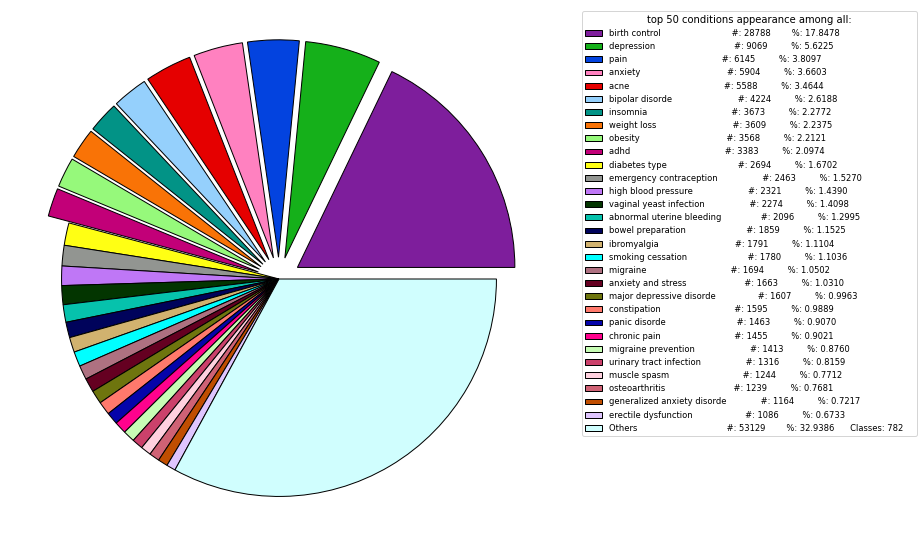

In [12]:
def conditions_plot(train_data_dict):
    
    # first construct an array of all the conditions
    conditions_arr = np.array([condition for condition in data['train']['condition']])
    
    
    
    conditions_count = dict()
    for condition in conditions_arr:
        if condition in conditions_count.keys():
            conditions_count[condition] += 1
        else:
            conditions_count.update({condition: 1})
    
    
    # now sort the conditions based on their appearance in training data 
    sorted_conditions_count = {k: v for k, v in sorted(conditions_count.items(), key=lambda item: item[1], reverse=True)}
    
    # select required conditions to consider based on conditions_selection_num
    top_conditions = dict(itertools.islice(sorted_conditions_count.items(), conditions_selection_num))
    
    # count all appeared conditions ( it would be equals to dataset size)
    all_conditions_count = sum(list(sorted_conditions_count.values()))
    
    #other cnditions from 51 to ... ranks
    other_conditions_count = all_conditions_count - sum(list(top_conditions.values()))
    
    # a list of proper label for each class containing their appearance count and percentage
    my_labels= list()
    
    # now fill my_labels list with proper data
    for condition_name in top_conditions.keys():
        # number of appearance of this condition 
        count = top_conditions[condition_name]
        # percentage of appearance of this condition among all conditions
        percentage = (count/all_conditions_count) * 100
        # now that we have every needed value, create a proper string to be assigned as this condition's label  
        my_labels.append('{0:<40s}{1:<16s}{2:<16s}'.format(condition_name,'#: {}'.format(count),'%: {:.4f}'.format(round(percentage,4))))
    
    # also add a label for all other conditions that are not among top selected classes
    # number of remained classes
    other_classes_count = len(sorted_conditions_count) - conditions_selection_num
    # percentage of their appearance among all conditions
    others_percentage = (other_conditions_count/all_conditions_count) * 100 
    
    my_labels.append('{0:<40s}{1:<16s}{2:<16s}{3:<16}'.format('Others','#: {}'.format(other_conditions_count),
                                                              '%: {:.4f}'.format(round(others_percentage,4)),'Classes: {}'.format(other_classes_count)))
    
    # as there are 51 label, set the font to small to have a legend across the plot
    fontP = FontProperties()
    fontP.set_size('small')
    
    # define pie plots input value
    x = np.array(list(top_conditions.values()) + [other_conditions_count])
    
    # a list of colors to be assigned to each condition
    my_colors = ['#7e1e9c','#15b01a','#0343df','#ff81c0','#e50000','#95d0fc','#029386','#f97306','#96f97b','#c20078',
            '#ffff14','#929591','#bf77f6','#033500','#06c2ac','#00035b','#d1b26f','#00ffff','#ae7181','#650021',
            '#6e750e','#ff796c','#0504aa','#ff028d','#c7fdb5','#cb416b','#ffd1df','#cf6275','#c04e01','#dfc5fe',
            '#d0fefe','#580f41','#014d4e','#9aae07','#fdaa48','#6b8ba4','#d5b60a','#516572','#ff474c','#ffff84','#b790d4',
            '#047495','#98eff9','#87ae73','#fc5a50','#703be7','#2c6fbb','#7ef4cc','#bc13fe','#1e488f','#06b48b',
              '#d7fffe']
    
    # set a size to plot to have a more readable pie plot
    plt.figure(figsize=(10, 10))
    
    # explode those condtions that are going to be considered in classification
    explode_list = [0.1 if index < 10 else 0 for index in range(conditions_selection_num + 1)]
    
    # define the plot
    plt.pie(x, explode= explode_list, labels=my_labels, colors= my_colors, labeldistance= None, wedgeprops = {'edgecolor': 'black'})
    # define legend
    plt.legend(title="top 50 conditions appearance among all:",bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    # show the plot
    plt.show()


# an example of calling conditions_plot

with open(document_file_path + 'processed_data.pickle', 'rb') as processed_data_file:
    data = pickle.load(processed_data_file, encoding='utf8')
    conditions_plot(data)

## show more detaiels on conditions data

In [13]:
def conditions_detailes(train_data_dict):
    
    # first construct an array of all the conditions
    conditions_arr = np.array([condition for condition in data['train']['condition']])
    
    
    conditions_count = dict()
    for condition in conditions_arr:
        if condition in conditions_count.keys():
            conditions_count[condition] += 1
        else:
            conditions_count.update({condition: 1})
    
    
    # now sort the conditions based on their appearance in training data 
    sorted_conditions_count = {k: v for k, v in sorted(conditions_count.items(), key=lambda item: item[1], reverse=True)}
    
    # use only top 50 data for plot
    top_conditions = dict(itertools.islice(sorted_conditions_count.items(),conditions_selection_num ))
    
    # count all appeared conditions ( it would be equals to dataset size)
    all_conditions_count = sum(list(sorted_conditions_count.values()))

    # other cnditions from 51 to ... ranks
    other_conditions_count = all_conditions_count - sum(list(top_conditions.values()))
    
    # a list of detail for each condition
    detailes= list()
    # now fill details list with proper data
    for condition_name in top_conditions.keys():
        # number of appearance of this condition 
        count = top_conditions[condition_name]
        # percentage of appearance of this condition among all conditions
        percentage = (count/all_conditions_count) * 100
        # now that we have every needed value, create a proper string to be assigned as this condition's label  
        detailes.append('{0:<40s}{1:<16s}{2:<16s}'.format(condition_name,'#: {}'.format(count),'%: {:.4f}'.format(round(percentage, 4))))
#         print(round(percentage, 4))

    # also add a label for all other conditions that are not among top selected classes
    # number of remained classes
    other_classes_count = len(sorted_conditions_count) - conditions_selection_num
    # percentage of their appearance among all conditions
    others_percentage = (other_conditions_count/all_conditions_count) * 100 
    
    detailes.append('{0:<40s}{1:<16s}{2:<16s}{3:<16}'.format('Others','#: {}'.format(other_conditions_count),
                                                              '%: {:.4f}'.format(round(others_percentage,4)),'Classes: {}'.format(other_classes_count)))
#     print(round(others_percentage, 4))
    for count, detail in enumerate(detailes):
        print('{:<16s}'.format('rank: {}'.format(count+1)),detail)
        if count + 1 == selected_top:
            percentage = sum(list(top_conditions.values())[:selected_top]) / all_conditions_count * 100
            count = sum(list(top_conditions.values())[:selected_top])
            print('-'* 100)
            print('{0:<16s} {1:<40s}{2:<16s}{3:<16s}'.format('top {} '.format(selected_top), ' ','#: {}'.format(count),
                                                              '%: {:.4f}'.format(round(percentage, 4))))
            print('-'* 100)

    print('-'* 100)
    print('{0:<16s} {1:<40s}{2:<16s}{3:<16s}'.format('all condtions', ' ','#: {}'.format(all_conditions_count),
                                                              '%: {:.4f}'.format(100.0)))
    print('-'* 100)

# an example of calling conditions_detailes
with open(document_file_path + 'processed_data.pickle', 'rb') as processed_data_file:
    data = pickle.load(processed_data_file, encoding='utf8')
    conditions_detailes(data)

rank: 1          birth control                           #: 28788        %: 17.8478      
rank: 2          depression                              #: 9069         %: 5.6225       
rank: 3          pain                                    #: 6145         %: 3.8097       
rank: 4          anxiety                                 #: 5904         %: 3.6603       
rank: 5          acne                                    #: 5588         %: 3.4644       
rank: 6          bipolar disorde                         #: 4224         %: 2.6188       
rank: 7          insomnia                                #: 3673         %: 2.2772       
rank: 8          weight loss                             #: 3609         %: 2.2375       
rank: 9          obesity                                 #: 3568         %: 2.2121       
rank: 10         adhd                                    #: 3383         %: 2.0974       
----------------------------------------------------------------------------------------------------